In [75]:
from tqdm import tqdm
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### File Extraction

In [113]:
from pathlib import Path
download_path = str(Path.cwd()) #making a relative path wrt the data folder
import shutil
shutil.unpack_archive("./ExtraSensory.per_uuid_features_labels.zip", f"{download_path}/Extracted")
csv_path = f"{download_path}/Extracted/" #csv files
all_files = Path(csv_path).glob('*.gz')

In [114]:
df_master = pd.DataFrame()

def dateparse (time_in_secs):    
    return datetime.datetime.fromtimestamp(float(time_in_secs))

for filename in tqdm(all_files):
        user = Path(filename).name.split('.')[0]
        df = pd.read_csv(filename, compression='gzip', date_parser=dateparse, index_col='timestamp')
        df['user'] = user
        df_master = pd.concat([df_master, df])

print(df_master.info())

60it [00:35,  1.70it/s]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 377346 entries, 2015-10-05 21:06:01 to 2015-10-07 16:23:39
Columns: 278 entries, raw_acc:magnitude_stats:mean to user
dtypes: float64(276), int64(1), object(1)
memory usage: 803.2+ MB
None


In [7]:
#list(df_master.columns)

['raw_acc:magnitude_stats:mean',
 'raw_acc:magnitude_stats:std',
 'raw_acc:magnitude_stats:moment3',
 'raw_acc:magnitude_stats:moment4',
 'raw_acc:magnitude_stats:percentile25',
 'raw_acc:magnitude_stats:percentile50',
 'raw_acc:magnitude_stats:percentile75',
 'raw_acc:magnitude_stats:value_entropy',
 'raw_acc:magnitude_stats:time_entropy',
 'raw_acc:magnitude_spectrum:log_energy_band0',
 'raw_acc:magnitude_spectrum:log_energy_band1',
 'raw_acc:magnitude_spectrum:log_energy_band2',
 'raw_acc:magnitude_spectrum:log_energy_band3',
 'raw_acc:magnitude_spectrum:log_energy_band4',
 'raw_acc:magnitude_spectrum:spectral_entropy',
 'raw_acc:magnitude_autocorrelation:period',
 'raw_acc:magnitude_autocorrelation:normalized_ac',
 'raw_acc:3d:mean_x',
 'raw_acc:3d:mean_y',
 'raw_acc:3d:mean_z',
 'raw_acc:3d:std_x',
 'raw_acc:3d:std_y',
 'raw_acc:3d:std_z',
 'raw_acc:3d:ro_xy',
 'raw_acc:3d:ro_xz',
 'raw_acc:3d:ro_yz',
 'proc_gyro:magnitude_stats:mean',
 'proc_gyro:magnitude_stats:std',
 'proc_gyro

In [120]:
print('DataFrame Rows: ',df_master.shape[0],'DataFrame Cols: ',df_master.shape[1])
df_master.isna().sum().sort_values(ascending=False)

DataFrame Rows:  377346 DataFrame Cols:  279


label:SINGING                           352229
lf_measurements:relative_humidity       351407
lf_measurements:temperature_ambient     350896
label:AT_A_BAR                          344126
label:AT_THE_GYM                        332953
                                         ...  
discrete:battery_state:is_unknown            0
discrete:battery_plugged:missing             0
discrete:battery_plugged:is_wireless         0
discrete:battery_plugged:is_usb              0
date                                         0
Length: 279, dtype: int64

In [121]:
# Count of labels present in data
label_start= df_master.columns.get_loc('label:LYING_DOWN')
label_end =df_master.columns.get_loc('label:WITH_FRIENDS')

df_master.iloc[:,label_start:label_end+1].sum() #count

label:LYING_DOWN                 104210.0
label:SITTING                    136356.0
label:FIX_walking                 22136.0
label:FIX_running                  1090.0
label:BICYCLING                    5020.0
label:SLEEPING                    83055.0
label:LAB_WORK                     3848.0
label:IN_CLASS                     6110.0
label:IN_A_MEETING                 5153.0
label:LOC_main_workplace          33944.0
label:OR_indoors                 184692.0
label:OR_outside                  12114.0
label:IN_A_CAR                     6083.0
label:ON_A_BUS                     1794.0
label:DRIVE_-_I_M_THE_DRIVER       7975.0
label:DRIVE_-_I_M_A_PASSENGER      2526.0
label:LOC_home                   152892.0
label:FIX_restaurant               2098.0
label:PHONE_IN_POCKET             23401.0
label:OR_exercise                  8081.0
label:COOKING                      4029.0
label:SHOPPING                     1841.0
label:STROLLING                     806.0
label:DRINKING__ALCOHOL_          

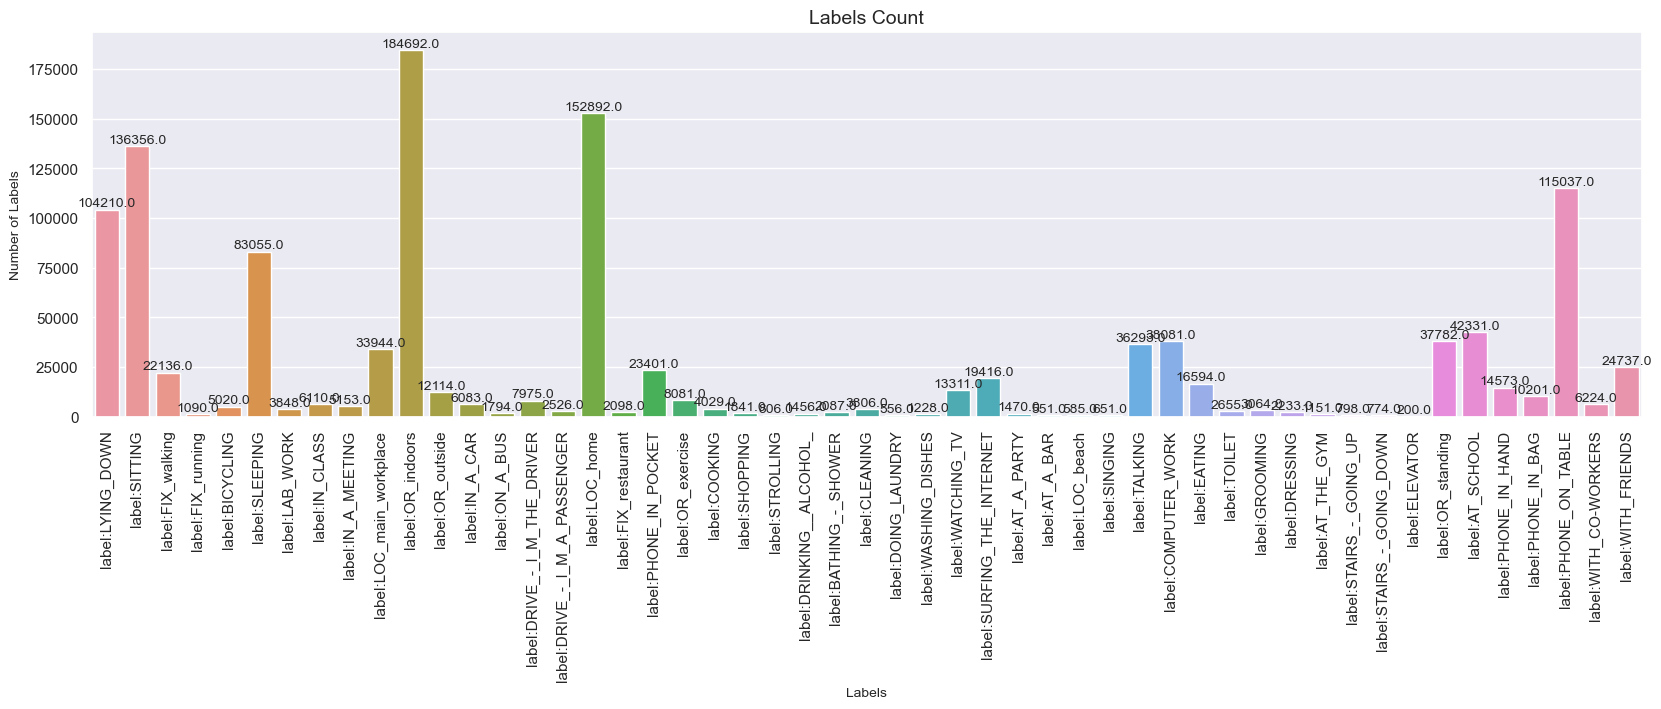

In [122]:
#Labels count
categories = list(df_master.iloc[:,label_start:label_end+1].columns)
sns.set(font_scale = 1)
plt.figure(figsize=(20,5))
ax= sns.barplot(x=categories,y=df_master.iloc[:,label_start:label_end+1].sum().values)
plt.title("Labels Count", fontsize=14)
plt.ylabel('Number of Labels', fontsize=10)
plt.xlabel('Labels', fontsize=10)
rects = ax.patches
labels = df_master.iloc[:,label_start:label_end+1].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=90)
plt.show()

In [123]:
#Common label combination in data
label_section= df_master.iloc[:,label_start:label_end+1]
combination = label_section.apply(lambda row: row[row == 1].index.tolist(), axis=1)
combination = pd.DataFrame(combination)
df_master['combination'] = [' , '.join(map(str, l)) for l in combination[0]]

In [139]:
#Top 20 combination of labels
a=df_master['combination'].value_counts()[1:21]
a.to_excel('x.xlsx')

In [126]:
# Change in label over time
df_master['date']=df_master.index
df_master['date']=df_master['date'].apply(lambda x : x.date())
df_master_time = df_master.groupby(['date']).sum()

C:\Users\Emmanuel Twum Osafo\AppData\Local\Temp\ipykernel_23872\1215757636.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_master_time = df_master.groupby(['date']).sum()


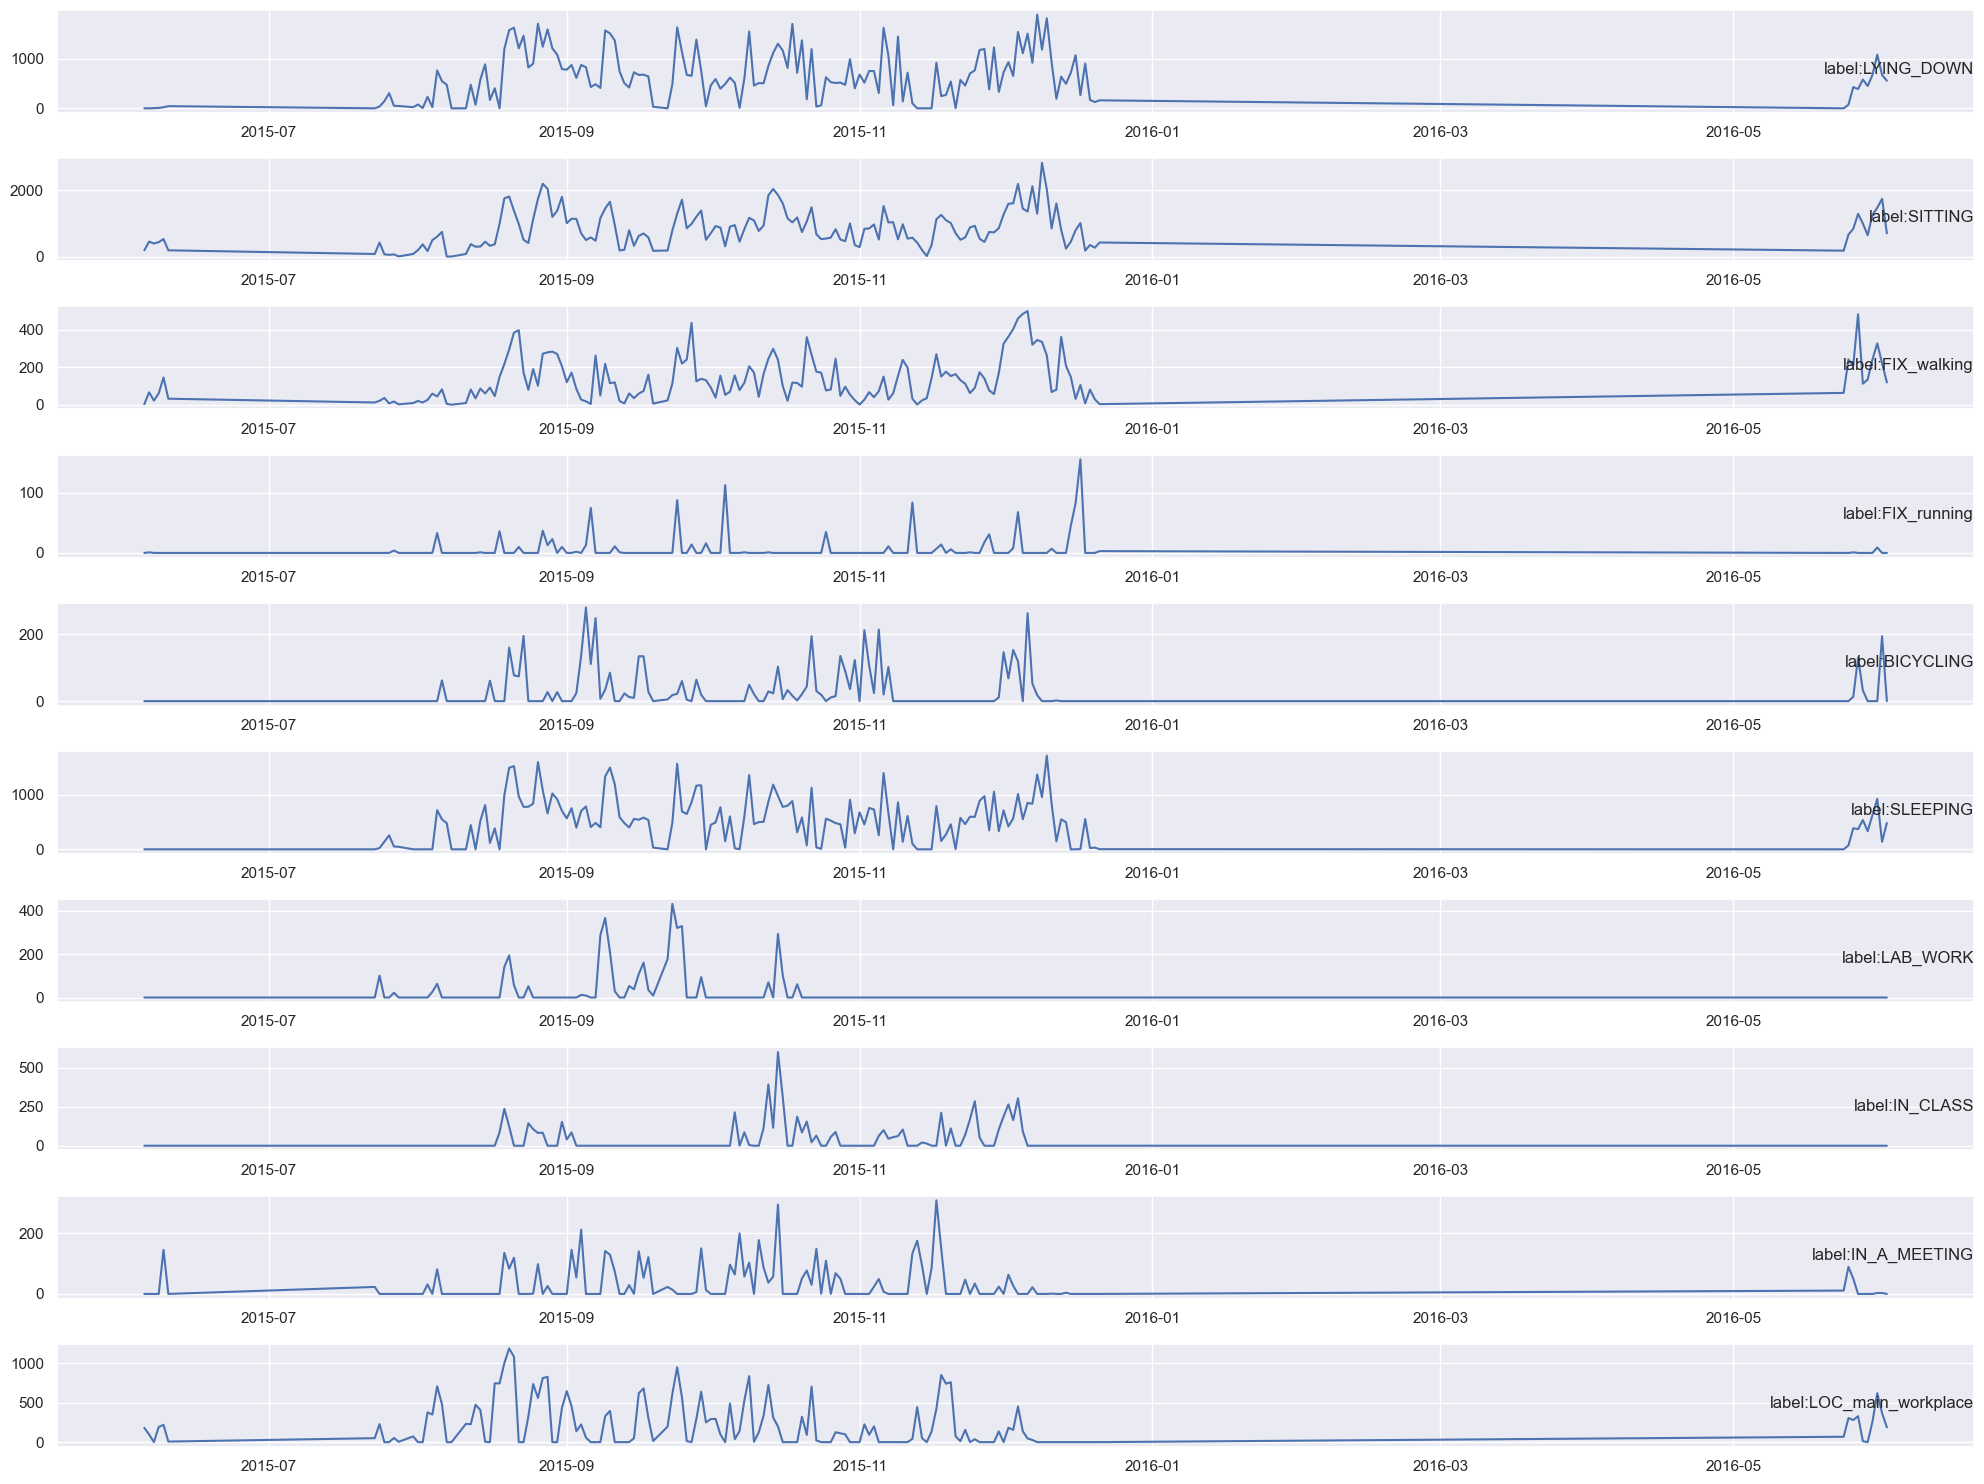

In [135]:
#Sample 10 recorded activities over time
activity_label = df_master_time.iloc[:,label_start:label_end]
label_cols = activity_label.columns.to_list()[:10]
i = 1
# plot each column
plt.figure(figsize=(20,15))
for label_col in label_cols:
 plt.subplot(len(label_cols), 1, i)
 plt.plot(activity_label.loc[:, label_col])
 plt.title(label_col, y=0.3, loc='right')
 i += 1
plt.tight_layout()
plt.show()

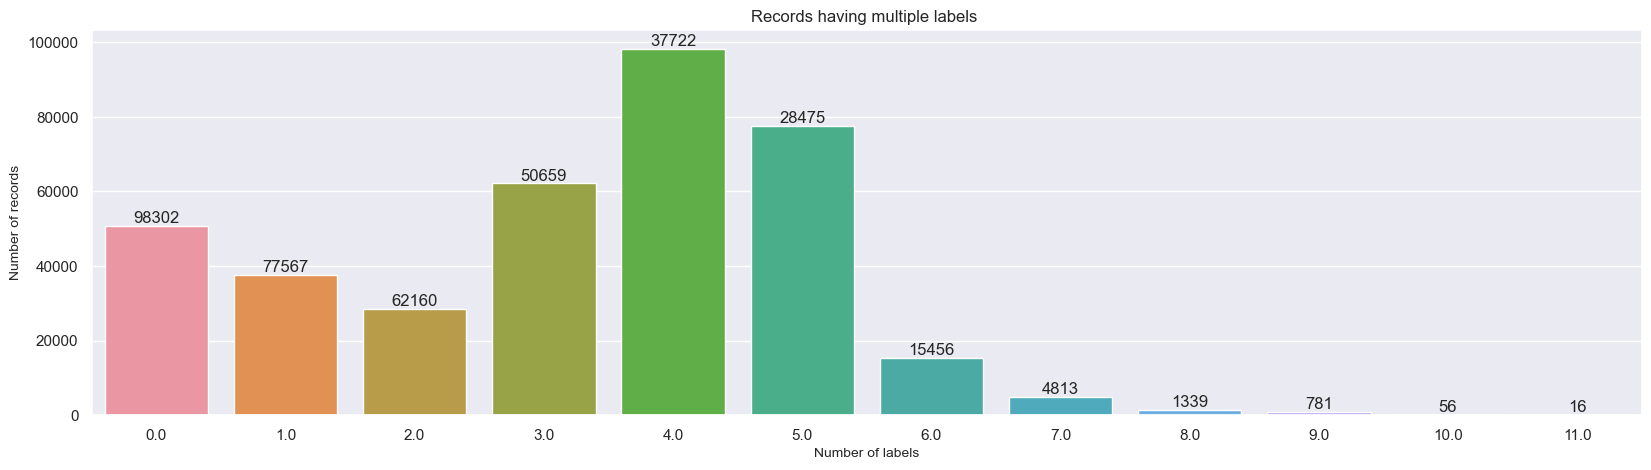

In [141]:
#Records with Multiple label
rowSums = df_master.iloc[:,label_start:label_end+1].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
sns.set(font_scale = 1)
plt.figure(figsize=(20,5))
ax = sns.barplot(x=multiLabel_counts.index, y=multiLabel_counts.values)
plt.title("Records having multiple labels ")
plt.ylabel('Number of records', fontsize=10)
plt.xlabel('Number of labels', fontsize=10)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

There are 98302 records with no labels. It is also evident that most records belong to several labels simultaneously

### Feature Selection

 #### Removing highly correlated features and labels
 if features x and y are correlated, you don't want to use an algorithm that drops both. Second, if x and y are pairwise correlated and features y and z are also pairwise correlated, you want the algorithm to only remove y. In this sense, you want it to remove the minimum number of features so that no remaining features have correlations above your threshold.

In [92]:
from collections import Counter

def corr_cleaner(df,corr_cutoff):
    '''
    df: pandas dataframe with column headers.
    corr_cutoff: float between 0 and 1.
    '''
    abs_corr_matrix = df.corr().abs()
    filtered_cols = []
    while True:
        offenders = []
        for i in tqdm(range(len(abs_corr_matrix))):
            for j in range(len(abs_corr_matrix)):
                if i != j:
                    if abs_corr_matrix.iloc[i,j] > corr_cutoff:
                        offenders.append(df.columns[i])

        if len(offenders) > 0: # if at least one high correlation remains
            c = Counter(offenders)
            worst_offender = c.most_common(1)[0][0]  # var name of worst offender
            del df[worst_offender]
            filtered_cols.append(worst_offender)
            abs_corr_matrix.drop(worst_offender, axis=0, inplace=True) #drop from x-axis
            abs_corr_matrix.drop(worst_offender, axis=1, inplace=True) #drop from y-axis
        else: # if no high correlations remain, break
            break

    return df, filtered_cols

In [93]:
df_master, col_drop = corr_cleaner(df_master, 0.7)

C:\Users\Emmanuel Twum Osafo\AppData\Local\Temp\ipykernel_23872\3271840697.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs_corr_matrix = df.corr().abs()
100%|██████████| 185/185 [00:00<00:00, 376.27it/s]


In [97]:
#Drop all records with no labels
df_master=df_master[~(df_master.combination=="")]
df_master=df_master.fillna(0)

## Multi-Label Classification 

The nature of the data present a unique modelling challenge. ie Time Series Multi-Label Classification.
Multi-Label Classification because most records belong to several labels simultaneously

In [98]:
import random
random.seed(10)
users =df_master.user.unique().tolist()
train_set = random.sample(users, k=round(len(users) * 0.8))

feature_start = df_master.columns.get_loc('raw_acc:magnitude_stats:percentile25')
feature_end = df_master.columns.get_loc('discrete:time_of_day:between21and3')
label_start= df_master.columns.get_loc('label:SITTING')
label_end =df_master.columns.get_loc('label:WITH_FRIENDS')

df_train= df_master[df_master['user'].isin(train_set)]
df_test =df_master[~df_master['user'].isin(train_set)]
train_input= df_train.iloc[:,feature_start:feature_end+1]
train_output = df_train.iloc[:,label_start:label_end+1]

In [99]:
from numpy import std
from numpy import mean
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold
from keras.layers import Dense
from keras.models import Sequential

In [100]:
# model Creation
def get_model(x_inputs, x_outputs):
    model = Sequential()
    model.add(Dense(10, input_dim=x_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(x_outputs, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(p, q):
    results = list()
    x_inputs, x_outputs = p.shape[1], q.shape[1]
    # define evaluation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # enumerate folds
    for train_ix, test_ix in tqdm(cv.split(p)):
        # prepare data
        p_train, p_test = np.asarray(p.iloc[train_ix]), np.asarray(p.iloc[test_ix])
        q_train, q_test = np.asarray(q.iloc[train_ix]), np.asarray(q.iloc[test_ix])
        # define 
        model = get_model(x_inputs, x_outputs)
        # model fitting
        model.fit(p_train, q_train, verbose=0, epochs=100)
        # prediction on the test set
        qhat = model.predict(p_test)
        # round probabilities to class labels
        qhat = qhat.round()
        acc = accuracy_score(q_test, qhat)
        # result store
        print('>%.3f' % acc)
        results.append(acc)
    return results


# evaluating model
results = evaluate_model(train_input, train_output)
# summarizing performance
print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))

0it [00:00, ?it/s]

797/797 [==============================] - 2s 3ms/step


1it [19:26, 1166.03s/it]

>0.080
797/797 [==============================] - 1s 1ms/step


2it [38:56, 1168.74s/it]

>0.171
797/797 [==============================] - 2s 2ms/step


3it [57:08, 1133.65s/it]

>0.127
797/797 [==============================] - 1s 1ms/step


4it [1:17:53, 1177.77s/it]

>0.135


4it [1:18:05, 1171.34s/it]


KeyboardInterrupt: 